In [9]:
import pandas as pd

# Load the datasets
anime_df = pd.read_csv('data/anime.csv')
ratings_df = pd.read_csv('data/rating.csv')


In [14]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
# Handle missing genres
anime_df['genre'] = anime_df['genre'].fillna('')

# Drop entries where the anime name is unknown
anime_df = anime_df.dropna(subset=['name'])


Step 2: Define nodes and relationships
Identify the entities (potential nodes) and their relationships (edges) based on the dataset columns. 
Possible nodes and properties:
Anime: Attributes like title, episodes, score, type.
Genre: The genre name (e.g., 'Action', 'Fantasy').
Studio: The studio name.
User: A unique user ID. 
Possible relationships:
(Anime)-[:HAS_GENRE]->(Genre)
(Anime)-[:PRODUCED_BY]->(Studio)
(User)-[:RATED {rating: <value>}]->(Anime) 

In [11]:
import networkx as nx

# Create a directed graph to represent relationships
G = nx.DiGraph()

In [12]:
# Add Anime nodes with properties
for _, row in anime_df.iterrows():
    G.add_node(row['anime_id'],
               type='anime',
               title=row['name'],
               score=row['rating'],
               episodes=row['episodes'])


In [ ]:
# Add Genre and HAS_GENRE relationships
for _, row in anime_df.iterrows():
    anime_id = row['anime_id']
    genres = str(row['genre']).split(', ')
    for genre in genres:
        if genre:
            G.add_node(genre, type='genre')
            G.add_edge(anime_id, genre, relation='HAS_GENRE')

# Add RATED relationships from the ratings data
# Use a smaller sample for performance
sample_ratings = ratings_df.head(10000)
for _, row in sample_ratings.iterrows():
    user_id = f"user_{row['user_id']}"
    anime_id = row['anime_id']
    rating = row['rating']
    if rating != -1: # Filter out unrated items
        G.add_node(user_id, type='user')
        G.add_edge(user_id, anime_id, relation='RATED', rating=rating)


C:\Users\hanso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


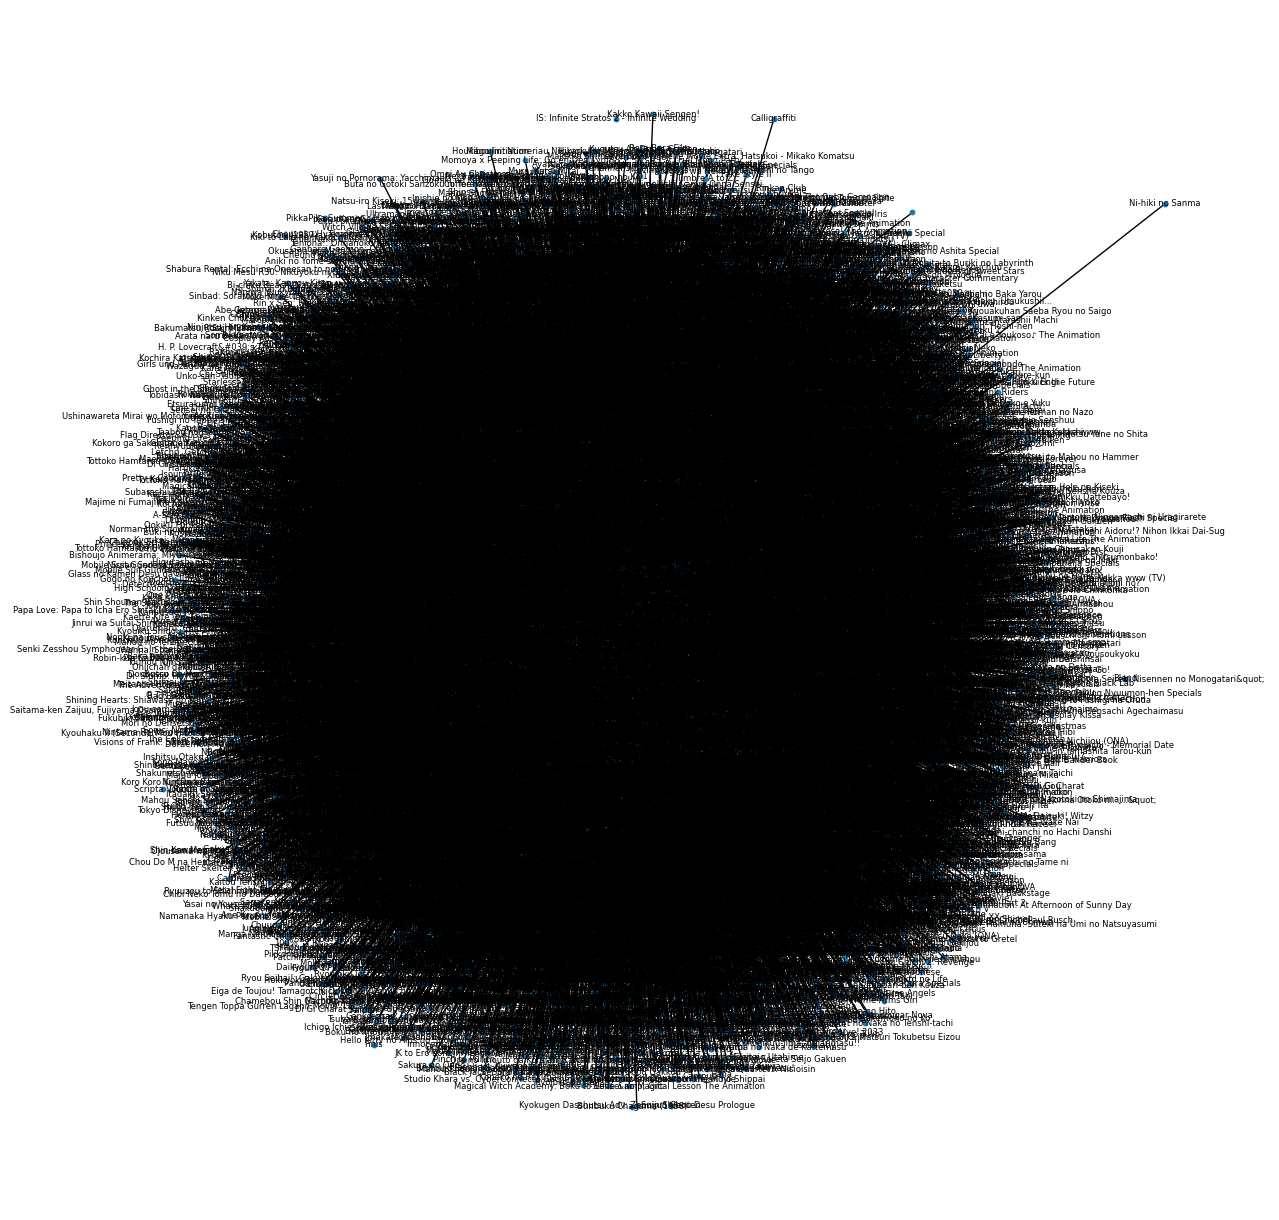

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20) # Layout for positioning nodes
nx.draw(G, pos, with_labels=False, node_size=10, font_size=8)
# Add labels to specific nodes for better clarity
for node, (x, y) in pos.items():
    if G.nodes[node]['type'] == 'anime':
        plt.text(x, y, G.nodes[node]['title'], fontsize=6, ha='center', va='center')
plt.show()


In [ ]:
# Find all anime in a specific genre:
target_genre = 'Action'
action_anime = [node for node in G.neighbors(target_genre) if G.nodes[node]['type'] == 'anime']
print(f"Action anime titles: {[G.nodes[a]['title'] for a in action_anime]}")


Action anime titles: []


In [ ]:
target_anime = 'Death Note'
anime_id = anime_df[anime_df['name'] == target_anime]['anime_id'].values[0]
fans = [s for s, t, d in G.in_edges(anime_id, data=True) if d['relation'] == 'RATED' and d['rating'] >= 9]
print(f"Users who rated '{target_anime}' highly: {fans}")


Users who rated 'Death Note' highly: ['user_3', 'user_7', 'user_12', 'user_16', 'user_17', 'user_18', 'user_21', 'user_25', 'user_29', 'user_32', 'user_33', 'user_39', 'user_40', 'user_44', 'user_46', 'user_48', 'user_51', 'user_58', 'user_62', 'user_68', 'user_69', 'user_75', 'user_79', 'user_80', 'user_84', 'user_87', 'user_88', 'user_91', 'user_97', 'user_98', 'user_104', 'user_105', 'user_106', 'user_108', 'user_110', 'user_112', 'user_117', 'user_118', 'user_120', 'user_121']
